<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 27.3 MB/s 
     |████████████████████████████████| 63 kB 364 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=73a6609428bc9ebc9ad206746eb4336deb0b49028f29b57ee1ebbbff55cb74cc
  Stored in directory: /root/.cache/pip/wheels/4

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

In [73]:
#companies = ['TSLA',"AMZN",'WMT','GOOG',"WEN","TGT",'T','TMUS', 'VZ','CTSH',"ACN"]
startDate = "2018-01-06"
#startDate = "2017-01-01"
#endDate = "2021-12-27"
companies = [             
'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',

'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL',  'GOOGL', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 
'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON','APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
 'AVY',
'BKR', 'BLL', 'BAC', 'BAX', 'BDX', 'BBY', 'BIO', 'BIIB','BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'COG', 'CDNS', 
'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'LUMN','CERN','CF','SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 
'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH','CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 
'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN','DXCM','FANG','DLR', 'DFS', 'DISCA', 
'T','DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV','DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY','ECL','EIX','EW','EA','EMR', 'ETR', 'EOG', 
'EFX', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'BEN', 
'FCX', 'GPS', 'GRMN','IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'GWW', 'H', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 
'HSIC', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 
'TT', 'INTC', 'IP', 'IPG', 'INT', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JCI', 'JPM', 'JNPR','K','KEY','LW','LVS',
'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'M', 'MRO', 'MPC','MKTX','MAR','MMC','MLM', 'MAS', 'MA', 
'MXIM', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MGM', 'MCHP', 'M', 'MSFT', 'MAA', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY',
'OXY','ODFL','OMC','OKE','ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI','PRGO','PFE','PM','PSX','PNW','PXD', 
'PNC','PPG','PPL','PFG','PG','PGR','PLD','PEG','PSA','PHM','PVH','QRVO','QCOM','PWR', 'DGX', 'RL', 'RJF', 'SLG', 'SNA', 'SO','LUV','SWK','SBUX',
'STT','STE','SYK','SIVB','SYF','SNPS','SYY','TMUS','TROW','TTWO', 'TPR', 'TGT', 'TEL', 'FTI','TDY','TFX','TXN','TXT','TDG','TFC','TWTR','TYL',
'TSN', 'USB', 'UDR', 'UL', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN','VRSK','VZ','VRTX','VFC','V','VNO', 
'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'W', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'TSLA', 'AAPL',
'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS','NFLX'

]

finalData=pd.DataFrame()
for company in companies:
  df = yf.download(company, 
                      start=startDate, 
                      #end=endDate, 
                      progress=False)
  df = df.drop(columns=['Open', 'High','Low', 'Volume',"Close"])
  df = df.rename(columns={'Adj Close': company})
  tmp = df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(companies)):
  finalData = finalData.rename(columns={i: companies[i]})




finalData['Date'] = finalData.index
col_name="Date"
first_col = finalData.pop(col_name)
finalData.insert(0, col_name, first_col)
finalData.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv', index = False, header=True)
finalData


1 Failed download:
- COG: No data found, symbol may be delisted

1 Failed download:
- INFO: No data found, symbol may be delisted

1 Failed download:
- MXIM: No data found, symbol may be delisted

1 Failed download:
- WLTW: No data found, symbol may be delisted

1 Failed download:
- XLNX: No data found, symbol may be delisted


,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,...,AAPL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,NFLX
2018-01-08,2018-01-08,209.142502,58.542915,54.674160,80.423981,207.800003,149.048386,64.631371,185.039993,107.702843,...,41.811283,25.565094,NaN,66.069389,77.042374,110.629997,118.772774,45.949306,72.399208,212.050003
2018-01-09,2018-01-09,210.442078,58.496681,54.767105,81.030243,209.759995,149.545441,64.204567,186.699997,106.832619,...,41.806496,25.505959,NaN,66.088402,76.838135,114.019997,116.862534,47.029507,73.247620,209.309998
2018-01-10,2018-01-10,210.319962,58.653919,54.683456,80.585640,208.139999,149.020264,64.825363,187.110001,106.929321,...,41.796894,25.641132,NaN,65.612938,76.643150,114.779999,115.300484,47.519684,72.077400,212.520004
2018-01-11,2018-01-11,211.340393,59.893402,55.057041,80.821747,210.149994,149.217178,67.163078,188.919998,109.211205,...,42.034309,26.916855,NaN,66.535324,76.587440,121.169998,115.074646,48.209553,72.740517,217.240005
2018-01-12,2018-01-12,213.224350,60.420658,54.954296,81.692909,215.110001,150.155045,68.249481,195.050003,112.102234,...,42.468365,27.685663,NaN,67.001282,77.636597,123.150002,114.895859,48.363869,73.520706,221.229996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,2022-04-25,148.600006,64.342247,120.010002,156.300003,302.140015,316.820007,78.050003,413.950012,223.869995,...,162.880005,17.660000,NaN,84.050003,121.269997,388.940002,127.809998,61.090000,180.300003,209.910004
2022-04-26,2022-04-26,144.220001,62.092312,116.970001,156.179993,285.869995,303.100006,77.059998,399.119995,223.440002,...,156.800003,17.459999,NaN,80.809998,116.690002,374.500000,124.150002,55.830002,176.970001,198.399994
2022-04-27,2022-04-27,144.210007,62.610001,116.720001,157.619995,277.149994,303.100006,76.099998,397.899994,224.880005,...,156.570007,17.070000,NaN,82.110001,116.900002,371.109985,122.879997,56.009998,178.470001,188.539993
2022-04-28,2022-04-28,147.139999,59.869999,118.010002,156.309998,287.220001,313.839996,76.699997,410.529999,209.389999,...,163.639999,17.530001,NaN,83.410004,119.519997,382.980011,124.610001,57.990002,181.309998,199.520004


In [59]:
#Check if any Columns have empty values(NAN)
df = finalData.copy()
df.sort_values(by=['Date'])
df.columns[df.isna().all()].tolist()



['INFO', 'MXIM', 'WLTW', 'AAPLXRX', 'XLNX']

In [64]:
# Drop columns that has all NaN values
df=df.dropna(axis=1,how='all')
df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,...,WMB,WYNN,XEL,TSLA,XYL,YUM,ZBRA,ZBH,ZION,ZTS
2018-01-08,2018-01-08,209.142502,58.542919,54.674152,80.423973,207.800003,149.048401,64.631355,185.039993,107.702843,...,25.203032,152.850906,42.647152,67.281998,66.069389,77.042374,110.629997,118.772774,45.949306,72.399208
2018-01-09,2018-01-09,210.442047,58.496677,54.767105,81.030251,209.759995,149.545471,64.204559,186.699997,106.832634,...,25.319067,153.886841,42.149574,66.737999,66.088402,76.838135,114.019997,116.862534,47.029507,73.247620
2018-01-10,2018-01-10,210.319977,58.653912,54.683464,80.585655,208.139999,149.020279,64.825378,187.110001,106.929329,...,25.334534,152.568314,41.733418,66.959999,65.612938,76.643150,114.779999,115.300484,47.519684,72.077400
2018-01-11,2018-01-11,211.340408,59.893410,55.057045,80.821770,210.149994,149.217224,67.163078,188.919998,109.211189,...,25.605289,153.039246,41.181549,67.589996,66.535324,76.587440,121.169998,115.074646,48.209553,72.740517
2018-01-12,2018-01-12,213.224335,60.420662,54.954300,81.692902,215.110001,150.155029,68.249481,195.050003,112.102234,...,25.690384,155.902252,40.846817,67.244003,67.001282,77.636597,123.150002,114.895859,48.363869,73.520706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,2022-04-26,144.220001,62.092312,116.970001,156.179993,285.869995,303.100006,77.059998,399.119995,223.440002,...,34.310001,68.220001,73.379997,876.419983,80.809998,116.690002,374.500000,124.150002,55.830002,176.970001
2022-04-27,2022-04-27,144.210007,62.610001,116.720001,157.619995,277.149994,303.100006,76.099998,397.899994,224.880005,...,34.320000,67.949997,72.970001,881.510010,82.110001,116.900002,371.109985,122.879997,56.009998,178.470001
2022-04-28,2022-04-28,147.139999,59.869999,118.010002,156.309998,287.220001,313.839996,76.699997,410.529999,209.389999,...,34.830002,70.739998,74.879997,877.510010,83.410004,119.519997,382.980011,124.610001,57.990002,181.309998
2022-04-29,2022-04-29,144.220001,58.430000,113.500000,146.880005,286.579987,300.359985,75.599998,395.950012,199.630005,...,34.290001,70.480003,73.260002,870.760010,80.500000,117.010002,369.660004,120.750000,56.509998,177.250000


In [65]:
data = df.dropna()
print("DataFrame after removing rows with NaN value in any column:")
print(data)

DataFrame after removing rows with NaN value in any column:
                 Date         MMM        AOS         ABT        ABBV  \
2018-01-08 2018-01-08  209.142502  58.542919   54.674152   80.423973   
2018-01-09 2018-01-09  210.442047  58.496677   54.767105   81.030251   
2018-01-10 2018-01-10  210.319977  58.653912   54.683464   80.585655   
2018-01-11 2018-01-11  211.340408  59.893410   55.057045   80.821770   
2018-01-12 2018-01-12  213.224335  60.420662   54.954300   81.692902   
...               ...         ...        ...         ...         ...   
2022-03-28 2022-03-28  149.470001  66.363220  119.513649  160.605011   
2022-03-29 2022-03-29  152.080002  67.179565  119.712860  160.813232   
2022-03-30 2022-03-30  151.429993  65.955040  119.902100  162.370010   
2022-03-31 2022-03-31  148.880005  63.605545  117.890121  160.743835   
2022-04-01 2022-04-01  149.690002  65.586685  118.109253  161.309021   

                  ABMD         ACN       ATVI        ADBE         AAP  ... 

AxesSubplot(0.125,0.2;0.775x0.68)
(1087, 1)


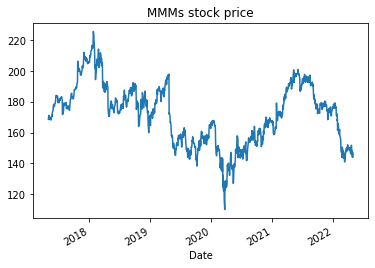

In [66]:
goodCompanies = ['MMM']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="5Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)


In [72]:
import plotly.express as px
goodCompanies = ['Date','NFLX','TSLA','FB','DXCM','LLY','TGT','WMT']

df = finalData[goodCompanies]

# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()
# plot interactive chart for stocks data
# plot interactive chart for stocks data
interactive_plot(df, 'Stock Prices')

In [36]:
finalDataEnd = finalData[(finalData['Date'] >= '2020-12-29') & (finalData['Date'] <= '2021-06-10')]


In [38]:
youtubeCompanies = ['Date','CTAS','MAR']
finalDataEnd[youtubeCompanies]

,Date,CTAS,MAR
2020-12-29,2020-12-29,343.398865,129.000000
2020-12-30,2020-12-30,346.226166,130.470001
2020-12-31,2020-12-31,349.419220,131.919998
2021-01-04,2021-01-04,339.671936,124.769997
2021-01-05,2021-01-05,344.901520,126.089996
...,...,...,...
2021-06-04,2021-06-04,349.686432,142.059998
2021-06-07,2021-06-07,344.324921,142.479996
2021-06-08,2021-06-08,344.950439,145.720001
2021-06-09,2021-06-09,345.397247,143.820007


In [ ]:
finalVolume=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Close',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Volume': company})
  tmp = tsla_df[str(company)]

  finalVolume = finalVolume.append(tmp, ignore_index=True)
finalVolume = finalVolume.T # or df2.transpose()
for i in range(len(companies)):
  finalVolume = finalVolume.rename(columns={i: companies[i]})




finalVolume['Date'] = finalVolume.index
col_name="Date"
first_col = finalVolume.pop(col_name)
finalVolume.insert(0, col_name, first_col)
finalVolume.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceVolume.csv', index = False, header=True)
finalVolume